**PREDICTING THE PRICE OF CAR:
    Using Linear Regression and Decision tree**

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


This Project is about predicting the prices of data using the above data. 

The column "Price" is the target variable and rest of the columns are independent variables.

In [75]:
from sklearn.linear_model import LinearRegression

We will be using Linear regression to predict the price of the car. 

Linear regression works on one independent value to predict the value of dependent variable. Here in this case the independent value can be any column while the predicted value should be price.

Linear Regression: 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋

In this case 'a' is the intercept value and 'b' is the slope(coef) value

In [140]:
#Creating a linear regression Object
lr = LinearRegression()

# Let us first conisder MPG (Miles per gallon) and check how it effects the price of the car.

X = df[['highway-mpg']]
Y = df['price']
lr.fit(X,Y)

# Predicting the price of 5 cars 
Yhat=lr.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Finding the value of intercept(intercept) and slope(coef)

In [105]:
lr.intercept_

38423.3058581574

In [106]:
lr.coef_

array([-821.73337832])

Putting this on linear regression equation.

price = 38423.31 - 821.73 x highway-mpg

Now, let us check with actual values on how our model is performing using a graph.

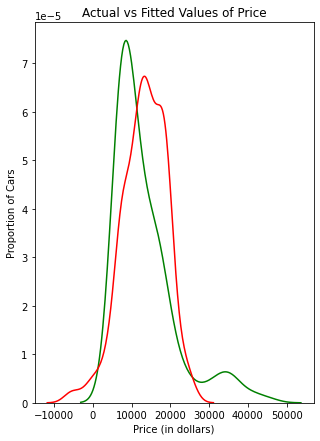

In [161]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(df['price'], hist=False, color="g", label="Actual Value")
sns.distplot(Yhat, hist=False, color="r", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values of Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The above graph clearly shows that the model is not a great fit

(0.0, 48189.75358363664)

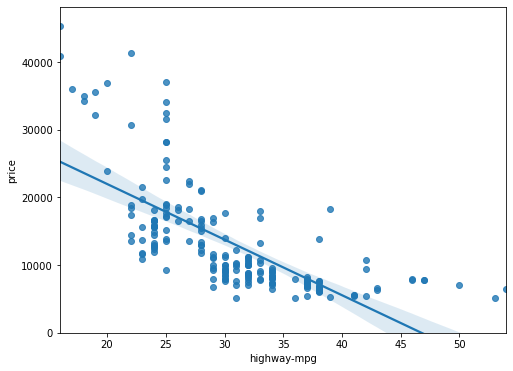

In [159]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Now, let us see how our model changes when we change the value to "City-mpg"

In [139]:
lr1 = LinearRegression()
lr1
X1 = df[['city-mpg']]
Y1 = df['price']
lr1.fit(X1,Y1)
Yhat1=lr1.predict(X1)
Yhat1[0:5]

array([16757.08312743, 16757.08312743, 18455.98957651, 14208.72345381,
       19305.44280105])

In [111]:
#Intercept value and coef value
lr1.intercept_

34595.600842778265

In [112]:
lr1.coef_

array([-849.45322454])

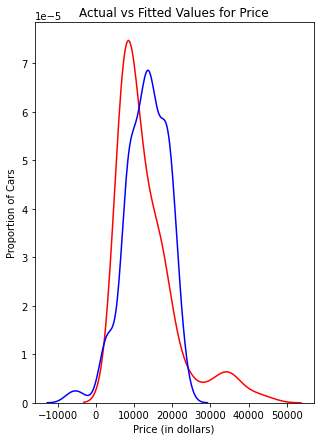

In [114]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can clearly see from the above graph shows city-mpg and highway-mpg has similar results

Now, Let's check out the co-relation in which price is strongly related

In [141]:
df[["city-mpg","horsepower","highway-mpg","price"]].corr()

,city-mpg,horsepower,highway-mpg,price
city-mpg,1.000000,-0.822214,0.972044,-0.686571
horsepower,-0.822214,1.000000,-0.804575,0.809575
highway-mpg,0.972044,-0.804575,1.000000,-0.704692
price,-0.686571,0.809575,-0.704692,1.000000


As per the above table, horsepower is highly related. So, now I am building a model with horsepower

In [142]:
lr2 = LinearRegression()
X2 = df[['horsepower']]
Y2 = df['price']
lr2.fit(X2,Y2)
Yhat2=lr2.predict(X2)
Yhat2[0:5]

array([14514.76823442, 14514.76823442, 21918.64247666, 12965.1201372 ,
       15203.50072207])

In [118]:
lr2.coef_

array([172.18312191])

In [119]:
lr2.intercept_

-4597.558297892916

(0.0, 47535.886938408046)

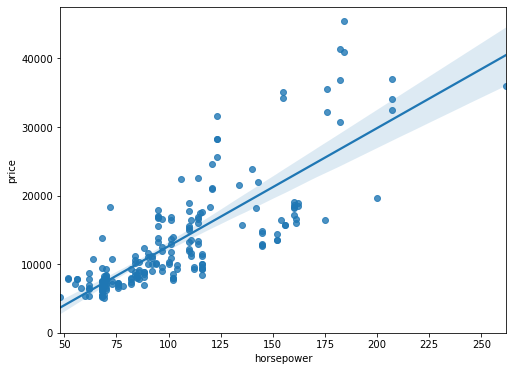

In [162]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

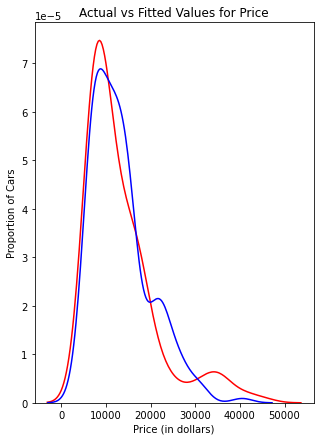

In [121]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax2 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat2, hist=False, color="b", label="Fitted Values" , ax=ax2)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The above graph shows horsepower has a greater co-relation with the price.

In real life examples there will be multiple factor that can influence the price. Like age of vechile, milage of vechile etc.In this case the price become dependent on more than one factor

Multiple Linear regression is similiar to Simple Linear regression. Here the number of independent factor are more to predict the final result. 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4.......

I have selected following data to consider the final price

- Horsepower

- Curb-weight

- Engine-size

- Highway-mpg

- peak rpm

- city-L/100km

In simple linear regression we took 1 factor but here we have 6.

In [122]:
Z1 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','peak-rpm','city-L/100km']]

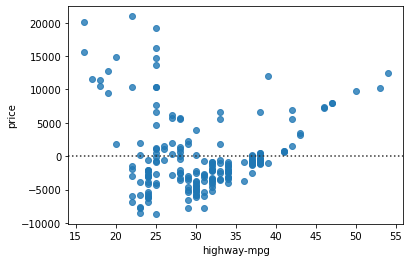

In [157]:
plt.figure(figsize=(6, 4))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data. 

Similarly, we can plot for remaining values.

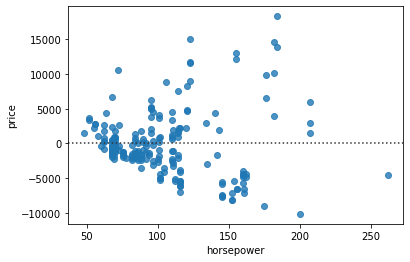

In [163]:
plt.figure(figsize=(6, 4))
sns.residplot(df['horsepower'], df['price'])
plt.show()

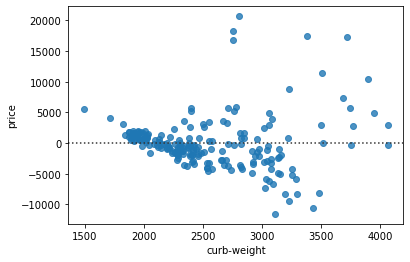

In [164]:
sns.residplot(df['curb-weight'], df['price'])
plt.show()

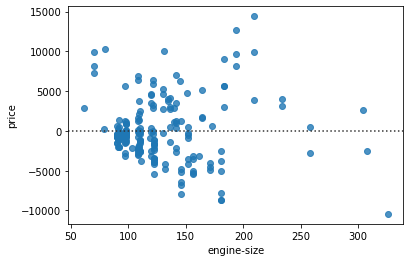

In [165]:
sns.residplot(df['engine-size'], df['price'])
plt.show()



Now, I am predicting the price considering all the factors as mentioned above in Z1. 

Previously I had predicted the price using horsepower and highway-mpg. Now I'm considering all the data like curb-weight, engine size, peak rpm etc. 

In [147]:
#creating linear regression object
lr_multi = LinearRegression()
lr_multi.fit(Z1, df['price'])
lr_multi.coef_

array([3.75013913e-01, 5.74003541e+00, 9.17662742e+01, 3.70350151e+02,
       1.58733026e+00, 1.32242578e+03])

In [127]:
lr_multi.intercept_

-45782.76360478178

Predicting the match

In [128]:
Y_hat = lr_multi.predict(Z1)
Y_hat

array([13548.76833369, 13548.76833369, 18349.65620071, 10462.04778866,
       17093.45921256, 15474.35898958, 17408.75092424, 18040.15481983,
       18422.7805903 , 11371.66671604, 11371.66671604, 16782.30998818,
       17098.01193598, 18391.50046289, 28147.36990933, 29008.37522149,
       30280.05458674,  2710.22365762,  5934.07768106,  6134.97892056,
        5583.87178415,  6098.47115374,  8252.9513714 ,  6620.81437645,
        6747.09515557,  6747.09515557,  8614.5736025 , 11992.62104095,
       17903.7654461 ,  6474.50452529,  6751.48692366,  4496.90009121,
        6298.79195888,  6390.63252551,  6700.59443789,  6780.95493369,
       10116.56952617, 10420.79140313, 10506.89193435, 10897.21434253,
       11023.66235828, 10152.90253148,  9155.09867202, 12489.98914328,
       36592.39698599, 36592.39698599, 45042.428185  ,  3218.64309329,
        5534.3331489 ,  5563.03332598,  5792.63474255,  5821.33491963,
       10662.6629024 , 10662.6629024 , 10691.36307947, 13424.41734269,
      

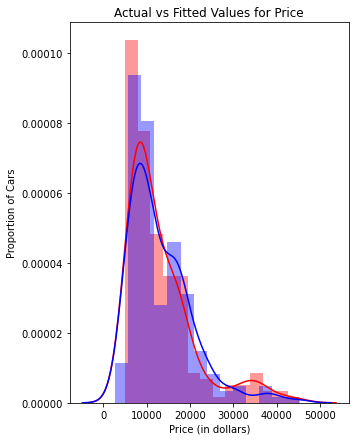

In [148]:
# GRAPH OF PREDICTED AND ACTUAL VALUES. 

plt.figure(figsize=(5,7))


ax_multi = sns.distplot(df['price'], hist=True, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=True, color="b", label="Fitted Values" , ax=ax_multi)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [130]:
# fit the model 
lr_multi.fit(Z1, df['price'])
# Find the R^2
print('The R-square is: ', lr_multi.score(Z1, df['price']))

The R-square is:  0.831334904256442


The R-square value should be between 0-1 with 1 as the best fit. In this case we can say 0.83 is a good prediction.

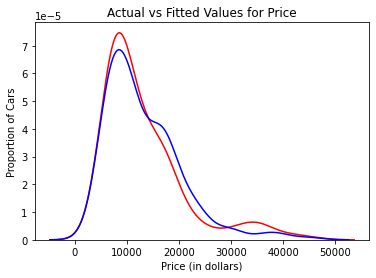

In [131]:
import seaborn as sns

ax2 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The above graph shows the difference between the Actual value and the predicted value. 

**PREDICTING USING DECISION TREE**

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv")

In [167]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64


In [168]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('price',axis=1)
y = df['price']

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [177]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [218]:
y_pred = regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
18,6295.0,5499.0
170,10698.0,8921.0
107,13860.0,22470.0
98,13499.0,14399.0
177,15750.0,15690.0
...,...,...
30,6855.0,6377.0
160,8238.0,9258.0
40,12945.0,9233.0
56,8845.0,10595.0


In [179]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root-Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2275.434426229508
Mean Squared Error: 10410135.56147541
Root-Mean Squared Error: 3226.474168728987


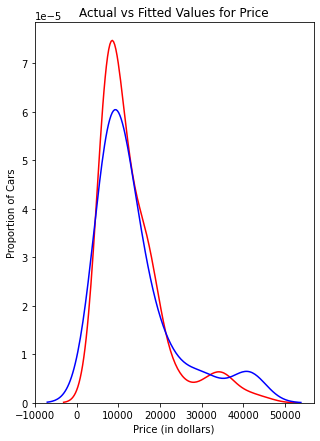

In [175]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()